In [2]:
#depencies and setup
import csv
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np

#import API, Citypy, Pretty Print
from config import api_key
from pprint import pprint
from citipy import citipy

#Base URL for openweathermap api
url = "http://api.openweathermap.org/data/2.5/find?q="

#Output CSV
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

632


# Perform API calls on each city
- Perform weather check on each city
- Print each city as it's being processed. City name and number

In [8]:
n = 1                                      # City number counter
print('Begin Data Retrieval\n-----------\n')
with open(output_data_file, mode='w', newline='') as output_file:
    
    weather_data_writer = csv.writer(output_file, dialect='excel')
    weather_data_writer.writerow(['City', 'Country', 'Cloudiness', 'Humidity', 'Lat', 'Lon', 'Temperature', 'Wind Speed'])
    for city in cities:
        response = requests.get(f'{url}{city.title()}&units=imperial&APPID={api_key}')
        response_json = response.json()
                        
        if response_json['count'] != 0:
            print(f'Processing Record {n} of {len(cities)} | {response_json["list"][0]["name"]}')
            n += 1
            weather_data_writer.writerow([response_json['list'][0]['name'], \
                                           response_json['list'][0]['sys']['country'], \
                                           response_json['list'][0]['clouds']['all'], \
                                           response_json['list'][0]['main']['humidity'], \
                                           response_json['list'][0]['coord']['lat'], \
                                           response_json['list'][0]['coord']['lon'], \
                                           response_json['list'][0]['main']['temp'], \
                                           response_json['list'][0]['wind']['speed']])
        else:
            print('City Not Found - Skip')
                      
    print(f'------------\nData Retrieval Finished {n - 1} cities total\n-------------')

Begin Data Retrieval
-----------

Processing Record 1 of 632 | Tasiilaq
Processing Record 2 of 632 | Klaksvik
Processing Record 3 of 632 | Port Alfred
City Not Found - Skip
Processing Record 4 of 632 | Albany
Processing Record 5 of 632 | Piacabucu
Processing Record 6 of 632 | Saint George
Processing Record 7 of 632 | Jamestown
Processing Record 8 of 632 | Darhan
Processing Record 9 of 632 | Hilo
Processing Record 10 of 632 | Victoria
Processing Record 11 of 632 | Castro
Processing Record 12 of 632 | Juneau
Processing Record 13 of 632 | Kaitangata
Processing Record 14 of 632 | Ojinaga
Processing Record 15 of 632 | Antalaha
Processing Record 16 of 632 | Sitka
Processing Record 17 of 632 | Kapaa
Processing Record 18 of 632 | Mahebourg
Processing Record 19 of 632 | Srednekolymsk
Processing Record 20 of 632 | Bluff
Processing Record 21 of 632 | Ust-Ordynskiy
Processing Record 22 of 632 | Puerto Ayora
Processing Record 23 of 632 | Alamos
Processing Record 24 of 632 | Beloha
Processing Record

Processing Record 198 of 632 | Campana
Processing Record 199 of 632 | Vestmannaeyjar
Processing Record 200 of 632 | Caravelas
Processing Record 201 of 632 | Hermanus
City Not Found - Skip
City Not Found - Skip
Processing Record 202 of 632 | Santa Cruz del Sur
Processing Record 203 of 632 | Pochutla
Processing Record 204 of 632 | Vada
Processing Record 205 of 632 | Kokopo
Processing Record 206 of 632 | Southbridge
Processing Record 207 of 632 | Tigil
Processing Record 208 of 632 | Seoul
Processing Record 209 of 632 | Coxim
Processing Record 210 of 632 | Iskateley
Processing Record 211 of 632 | Biltine
City Not Found - Skip
Processing Record 212 of 632 | Tarakan
Processing Record 213 of 632 | Gorontalo
Processing Record 214 of 632 | Leh
Processing Record 215 of 632 | Bayir
Processing Record 216 of 632 | Puerto Escondido
Processing Record 217 of 632 | Cairns
City Not Found - Skip
Processing Record 218 of 632 | Batagay-Alyta
Processing Record 219 of 632 | Abengourou
Processing Record 220 o

Processing Record 390 of 632 | Nova Olinda do Norte
Processing Record 391 of 632 | Lyantonde
City Not Found - Skip
Processing Record 392 of 632 | Flinders
Processing Record 393 of 632 | Dennery
Processing Record 394 of 632 | Fomboni
Processing Record 395 of 632 | Puerto del Rosario
Processing Record 396 of 632 | Kalevala
Processing Record 397 of 632 | Tromso
Processing Record 398 of 632 | Saint-Louis
Processing Record 399 of 632 | Pemba
Processing Record 400 of 632 | Atar
Processing Record 401 of 632 | Polunochnoye
Processing Record 402 of 632 | Amazar
Processing Record 403 of 632 | Kununurra
Processing Record 404 of 632 | Willowmore
Processing Record 405 of 632 | Kailua
Processing Record 406 of 632 | Paamiut
Processing Record 407 of 632 | Ukiah
Processing Record 408 of 632 | Semnan
Processing Record 409 of 632 | Toumodi
Processing Record 410 of 632 | Yeppoon
Processing Record 411 of 632 | Basco
Processing Record 412 of 632 | Nokha
Processing Record 413 of 632 | Hede
Processing Record 

# Convert Raw Data to DataFrame
- Export city data into csv
- Display DF

In [9]:
weather_df = pd.read_csv(output_data_file)
weather_df.head()

,City,Country,Cloudiness,Humidity,Lat,Lon,Temperature,Wind Speed
0,Tasiilaq,GL,84,89,65.6145,-37.6368,33.80,3.36
1,Klaksvik,FO,95,100,62.2266,-6.5891,48.20,5.82
2,Port Alfred,ZA,92,74,-33.5906,26.8910,66.99,5.99
3,Albany,US,75,54,42.6512,-73.7550,71.80,18.34
4,Piacabucu,BR,91,82,-10.4056,-36.4345,79.29,6.82


# Plotting the Data
- Use proper labeling of plots with titles and axes labels
- save plotted figures as .png

# Latitude vs. Temperature

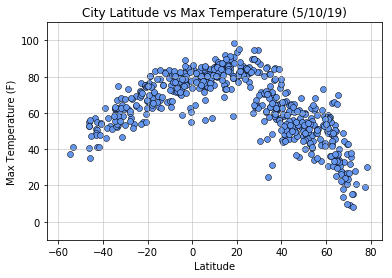

In [14]:
plt.scatter(weather_df.Lat, weather_df.Temperature, \
            marker='o', color='cornflowerblue', linewidths=0.5, edgecolors='black')

plt.title('City Latitude vs Max Temperature (5/10/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(fillstyle='bottom', alpha=0.6)
plt.ylim(top=110, bottom=-10)
plt.xlim(left=-65, right=85)

plt.savefig('images/Max_temp_vs_city_latitude.png', bbox_inches='tight')
plt.show()

# Latitude vs. Humidity

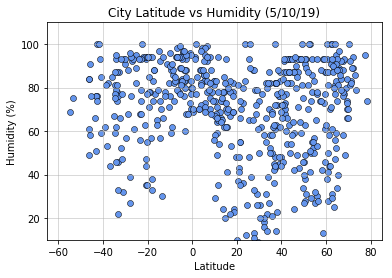

In [15]:
plt.scatter(weather_df.Lat, weather_df.Humidity, \
            marker='o', color='CornflowerBlue', linewidths=0.5, edgecolors='black')

plt.title('City Latitude vs Humidity (5/10/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(fillstyle='full', alpha=0.6)
plt.ylim(top=110, bottom=10)
plt.xlim(left=-65, right=85)

plt.savefig('images/Humidity_vs_city_latitude.png', bbox_inches='tight')
plt.show()

# Latitude vs Cloudiness

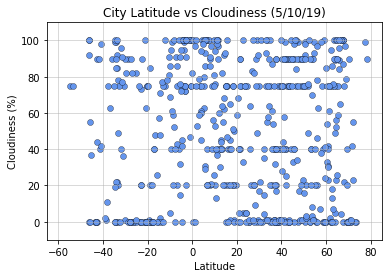

In [17]:
plt.scatter(weather_df.Lat, weather_df.Cloudiness, \
            marker='o', color='CornflowerBlue', linewidths=0.3, edgecolors='black')

plt.title('City Latitude vs Cloudiness (5/10/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(fillstyle='full', alpha=0.6)
plt.ylim(top=110, bottom=-10)
plt.xlim(left=-65, right=85)

plt.savefig('images/Cloudiness_vs_city_latitude.png', bbox_inches='tight')
plt.show()

# Latitude vs Wind Speed

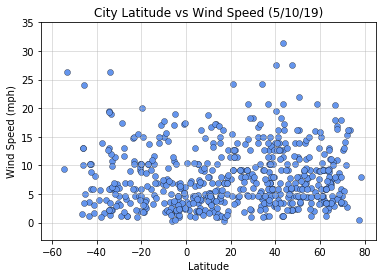

In [18]:
plt.scatter(weather_df.Lat, weather_df['Wind Speed'], \
            marker='o', color='CornflowerBlue', linewidths=0.3, edgecolors='black')

plt.title('City Latitude vs Wind Speed (5/10/19)', fontsize=12)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(fillstyle='full', alpha=0.5)
plt.ylim(top=35, bottom=-3)
plt.xlim(left=-65, right=85)

plt.savefig('images/Wind_speed_vs_city_latitude.png', bbox_inches='tight')
plt.show()